# Projet Numérique : Dynamique Quantique

## Résolution en états stationnaire 

Numba : a voir vers la fin
http://www.enit.rnu.tn/fr/Minds/quant/amphi6MQ.pdf pour explication sin et cos

In [124]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
L = 25

dx = L/N

print("dx : ", dx)

## On initialise x tel que 

x = np.linspace(-L/2,L/2,N)

#print("x : \n",x)

dx :  0.025


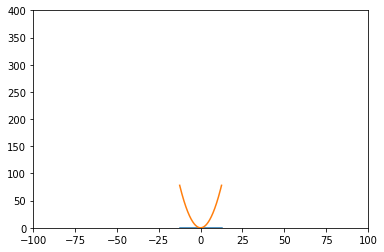

In [125]:
## On commence par former la liste de valeurs des vecteurs et V.

Pot1 = np.zeros(N) #potentiel nul
Pot2 = np.zeros(N) #potentiel harmonique

''' Pour un potentiel fini :
for i in range(x.size):
    if (x[i]<= -L/2) or (x[i]>=L/2):
        V[i] = 10

'''

omega = 1.
h_barre=np.sqrt(2.)

for i in range(N):
    Pot2[i] = (omega*x[i])**2 / 2.

#print("V1 : ", Pot1)
#print("V2 : ", Pot2)

plt.plot(x,Pot1)
plt.plot(x,Pot2)
plt.xlim(-100, 100)
plt.ylim(0, 400)


plt.show()

In [126]:
## Ensuite, on forme les matrices d et e diagonales principale et supérieure (resp) de H

def get_matrice(Pot):

    diag = np.zeros(N)
    tridiag= np.zeros(N-1)

    for i in range(Pot.size):
        diag[i] = 2/(dx**2) + Pot[i]

    for i in range(tridiag.size):
        tridiag[i] = -1/(dx**2)
        
    return diag,tridiag

diag1,tridiag1 = get_matrice(Pot1)

#print("d : \n", diag1)
#print("e : \n", tridiag1)

In [127]:
from scipy.linalg import eigh_tridiagonal

## Puis, on calcule w et v respectivement les valeurs propres et vecteurs propres de H

valp1, vectp1 = eigh_tridiagonal(diag1,tridiag1)

#print("val1 : \n", valp1)
#print("vect1 : \n", vectp1)

In [128]:
# On doit désormais normaliser les vecteurs propres :

def normalize(m, dx):
    m /= np.linalg.norm(m,axis=0)
    m /= np.sqrt(dx)
    return m

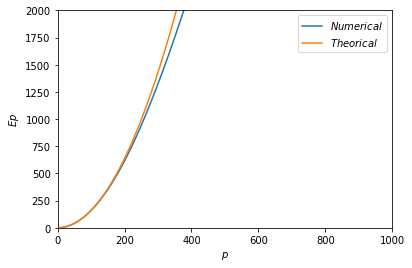

In [129]:
## On regarde la différence entre la courbe théorique et la courbe obtenu

p = np.arange(0,N,1)

En1 = np.zeros(N)
for i in range(N):
    En1[i] = (np.pi*(i+1)/L)**2

plt.plot(p,valp1,label="$Numerical$")
plt.plot(p,En1,label = "$Theorical$")
plt.xlabel('$p$')
plt.ylabel('$Ep$')
plt.xlim(0, 1000)
plt.ylim(0, 2000)
plt.legend()
plt.show()

In [130]:
# On compare le théorique et le calculé pour psi

def psi_theo(p):
    psi_theo = np.zeros(N)
    for i in range(N):
        if (p%2 == 0): #fonction pair
            psi_theo[i] = np.sqrt(2/L)*np.cos(((p+1)*np.pi*x[i])/(L*2))
        else: #fonction impair
            psi_theo[i] = np.sqrt(2/L)*np.sin(((p+1)*np.pi*x[i])/(L*2))
    return psi_theo

def get_valp(p,valp):
    new_valp = np.zeros(N)
    for i in range(new_valp.size):
        new_valp[i] = valp[p]
    return new_valp

In [131]:
# On crée la fonction pour former psi à partir de V (dans le cas où V n'est plus le même)

def get_psi(Pot):
    d,e = get_matrice(Pot)
    
    w, v = eigh_tridiagonal(d,e)
    
    for vec in v:
        normalize(v,dx)
    v0 = np.zeros((N,N))
    for i in range(N):
        for y in range(N):            #On échange ligne et colonnes
            v0[i][y] = v[y][i]
    
    return w,v0

# On crée la fonction pour afficher les graphiques

def get_graph(valp,vectp,name,theorical_psi):
    for i in range(2):
        plt.plot(x,valp[i]+vectp[i],label="Numérique $p=%i$" %i)
        plt.plot(x,theorical_psi(i)+valp[i],label = "Théorique $p=%i$" %i)
        plt.plot(x,get_valp(i,valp),"--",label = "Ep pour $p=%i$" %i)
    plt.xlabel('$x$')
    plt.ylabel('$\Psi(x)$')
    plt.title('Norme de $\Psi(x)$ en fonction de la position x (%i itérations)' %N)
    plt.legend()
    plt.show()

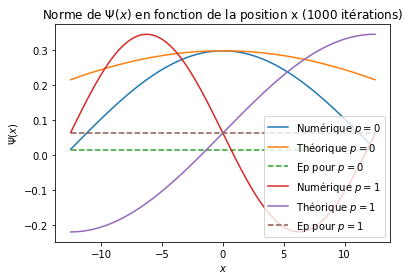

In [132]:
valp1,vectp1 = get_psi(Pot1)

get_graph(valp1,vectp1,"puit_infini",psi_theo)



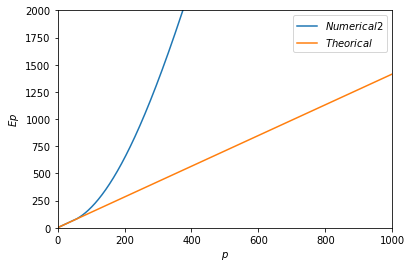

In [133]:
## On regarde la différence entre la courbe théorique et la courbe obtenu

# fonction pour avoir le psi théorique en harmonique 
def psi_theo_harmo(p):
    return np.zeros(N) ## A FAIRE 

valp2,vectp2 = get_psi(Pot2)

p = np.arange(0,N,1)

En2 = np.zeros(N)
for i in range(N):
    En2[i] = (i+1/2)*h_barre*omega

#print("valp1 : \n", valp1)
#print("valp2 : \n", valp2)
#print("vectp1 : \n", vectp1)
#print("vectp2 : \n", vectp2)



plt.plot(p,valp2,label="$Numerical2$")
plt.plot(p,En2,label = "$Theorical$")
plt.xlabel('$p$')
plt.ylabel('$Ep$')
plt.xlim(0, 1000)
plt.ylim(0, 2000)
plt.legend()
plt.show()

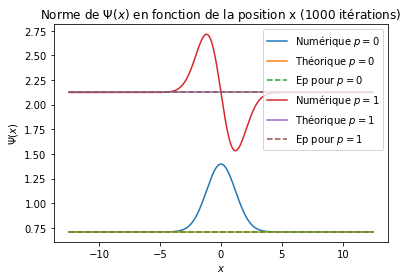

In [134]:


get_graph(valp2,vectp2,"harmonique",psi_theo_harmo)

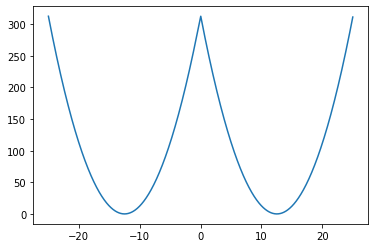

In [135]:
Pot3 = np.zeros(N)
x = np.linspace(-L,L,N)



for i in range(N):
    if i<N/2:
        Pot3[i] = (omega*x[2*i])**2 / 2.
    else:
        a = 2*(i-N/2)
        Pot3[i]= (omega*x[int(a)])**2 / 2.

        
plt.plot(x,Pot3)
plt.show()
 

NameError: name 'En3' is not defined

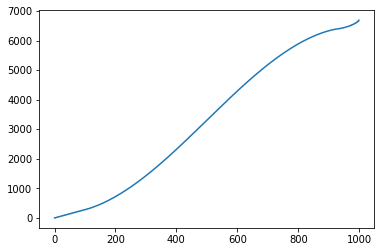

In [136]:
valp3,vectp3 = get_psi(Pot3)


p = np.arange(0,N,1)


#print("w : \n", valp3)


#plt.plot(p,w,label="$Numerical$")    
plt.plot(p,valp3,label="$Numerical$")
plt.plot(p,En3,label = "$Theorical$")
plt.xlabel('$p$')
plt.ylabel('$Ep$')
plt.xlim(0, 100)
plt.ylim(0, 2000)
plt.legend()
plt.show()


get_graph(valp3,vectp3,"puit_infini",psi_theo_harmo)
